<h1 style="color:violet; text-align:center;">Assignment #3</h1>
<h3 style="color:violet; text-align:center;">Shahar Dekel 318864436</h3>
<h3 style="color:violet; text-align:center;">Amit Feiner 316552710</h3>

<h2>Loading the dataset</h2>

In [88]:
# install packages at first run
#!pip install pandas
#!pip install seaborn
#!pip install tabulate

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy
import warnings
warnings.filterwarnings('ignore')
from statsmodels.regression.linear_model import OLS, RegressionResults
from tabulate import tabulate
import statsmodels.api as sm

dataset='framingham_heart_disease.csv'
df=pd.read_csv(dataset, sep=',')
df.columns.values
# removing unwanted columns
df.drop(['prevalentStroke', 'prevalentHyp','totChol','sysBP','diaBP','TenYearCHD'], axis='columns', inplace=True)
for val in ['age', 'heartRate']:
    df[val].fillna(df[val].mean(), inplace=True)
for val in ['currentSmoker', 'male']:
    df[val].dropna()
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,diabetes,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,25.97,66.0,86.0
4234,1,51,3.0,1,43.0,0.0,0,19.71,65.0,68.0
4235,0,48,2.0,1,20.0,NaN,0,22.00,84.0,86.0
4236,0,44,1.0,1,15.0,0.0,0,19.16,86.0,NaN


<h2>Part 1- Linear Regression</h2>
<h3>In this part, we chose to focus on 'male' (binary), 'age' (continuos) and 'currentSmoker' (binary) as explanatory variables (X$_1$, X$_2$, X$_3$) and 'heartRate' (continuos) as explained variable (Y)
<br><br>
1. <br> Our research question is- How does the sex, age and the fact that the person is a smoker or not affects the heart rate of the same person?
<br><br>
2.</h3>

In [89]:
subset=df.sample(200)
subset

,male,age,education,currentSmoker,cigsPerDay,BPMeds,diabetes,BMI,heartRate,glucose
1617,0,50,4.0,0,0.0,0.0,0,23.24,110.0,NaN
1236,1,68,1.0,0,0.0,0.0,0,22.85,70.0,60.0
3495,0,49,1.0,1,1.0,0.0,0,20.13,107.0,58.0
2052,1,44,1.0,0,0.0,0.0,0,29.89,76.0,87.0
1818,1,67,1.0,0,0.0,0.0,0,27.78,75.0,74.0
...,...,...,...,...,...,...,...,...,...,...
574,0,39,3.0,1,30.0,0.0,0,24.12,85.0,72.0
271,0,57,2.0,1,1.0,0.0,0,24.22,90.0,76.0
1475,0,46,2.0,1,3.0,0.0,0,21.82,63.0,66.0
494,1,56,3.0,1,20.0,0.0,0,21.91,50.0,72.0


<h3>3.</h3>

A
Gender Count
-----------
 0    112
1     88
Name: male, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

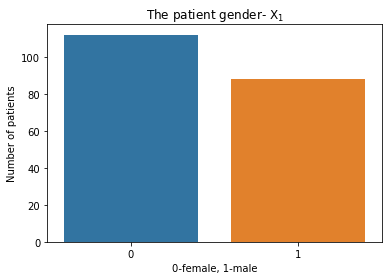

In [90]:
print("A")
#'male'
gender = subset['male'].value_counts() # 0 is female, 1 is male
#print(labels)
print('Gender Count\n-----------\n', gender)

ax1 = sns.barplot(x=gender.index , y=gender)
plt.title('The patient gender- X$_1$')
plt.ylabel('Number of patients')
plt.xlabel('0-female, 1-male')
plt.show

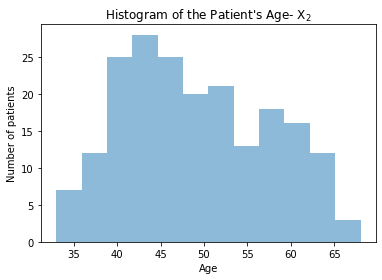

In [91]:
#'age'
age = subset['age']
ax = age.plot.hist(bins=12, alpha=0.5, title = "Histogram of the Patient's Age- X$_2$")
plt.ylabel('Number of patients')
plt.xlabel('Age')
plt.show()


CS   Count
-----------
 0    104
1     96
Name: currentSmoker, dtype: int64


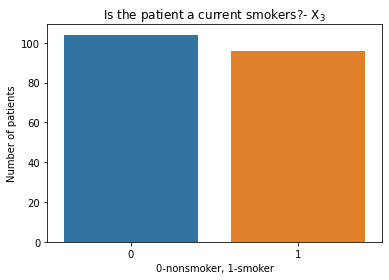

In [92]:
#'currentSmoker'
cs=subset['currentSmoker'].value_counts() # 0 is a nonsmoker, 1 is a smoker
print('CS   Count\n-----------\n', cs)

ax2 = sns.barplot(x=cs.index , y=cs)
plt.title('Is the patient a current smokers?- X$_3$')
plt.ylabel('Number of patients')
plt.xlabel('0-nonsmoker, 1-smoker')
plt.show()

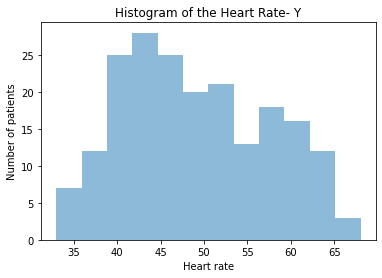

In [93]:
#'heartRate'
hr = subset['heartRate']
ax = age.plot.hist(bins=12, alpha=0.5, title = 'Histogram of the Heart Rate- Y')
plt.ylabel('Number of patients')
plt.xlabel('Heart rate')
plt.show()

In [94]:
print("B")
# missing values
gender_cnt = len(gender)
age_cnt = len(age)
cs_cnt = len(cs)
heart_cnt = len(hr)
num_nan_gender = gender_cnt-len(gender)
num_nan_age = age_cnt-len(age)
num_nan_cs = cs_cnt-len(cs)
num_nan_hr = heart_cnt-len(hr)
print("Missing values for 'gender':", num_nan_gender)
print("Missing values for 'age':", num_nan_age)
print("Missing values for 'currentSmoker':", num_nan_cs)
print("Missing values for 'heartRate':", num_nan_hr)

# symetric distributions
print("As we see from every run on section 3A- the distributions change. Sometimes they are symmetrical and sometimes not.\nTherefore, we can not rely on the symmetries of the distribution.")

B
Missing values for 'gender': 0
Missing values for 'age': 0
Missing values for 'currentSmoker': 0
Missing values for 'heartRate': 0
As we see from every run on section 3A- the distributions change. Sometimes they are symmetrical and sometimes not.
Therefore, we can not rely on the symmetries of the distribution.


C
Our continuos variable is 'age'- X2


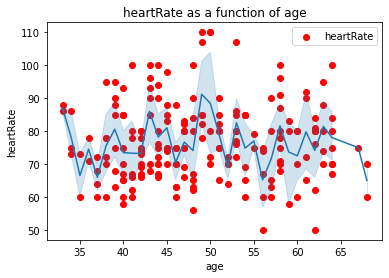

We can see that the heart-rate does not change drastically between the ages of 35-55 and 60-70,
and between the ages of 55-60 and over 70 it gets a jump


In [95]:
print("C")
print("Our continuos variable is 'age'- X2")
plt.scatter(data=subset, x='age',y='heartRate', c='red')
sns.lineplot(data=subset,x='age',y='heartRate')
plt.title('heartRate as a function of age')
plt.show()
print("We can see that the heart-rate does not change drastically between the ages of 35-55 and 60-70,\nand between the ages of 55-60 and over 70 it gets a jump")

D
Our binary variables are 'male'-X1 and 'currentSmoker'-X3


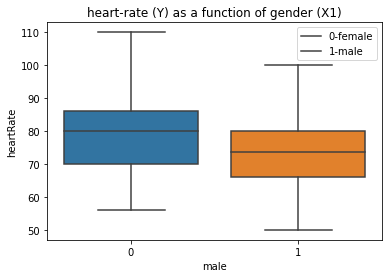

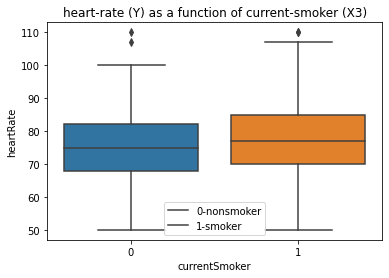

In [96]:
print("D")
print("Our binary variables are 'male'-X1 and 'currentSmoker'-X3")

# male (gender)
labels_gender=["0-female","1-male"]
sns.boxplot(data=subset,x='male',y='heartRate')
plt.title("heart-rate (Y) as a function of gender (X1)")
plt.legend(labels_gender)
plt.show()

# currentSmoker
labels_smoker=['0-nonsmoker', '1-smoker']
sns.boxplot(data=subset,x='currentSmoker',y='heartRate')
plt.title("heart-rate (Y) as a function of current-smoker (X3)")
plt.legend(labels_smoker, loc='lower center')
plt.show()

<h3>4.</h3>

In [97]:
# find beta-hat
subset.loc[:,"ones"] = 1
Y = subset["heartRate"]
X = subset[["ones","male","age","currentSmoker"]]
X = X.to_numpy()
Y = (Y.to_numpy()).reshape((-1,1))

beta_hat = np.dot(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),Y)
np.set_printoptions(precision=5,suppress=True)

curr = OLS(Y, X).fit()
Rsquared_adj=curr.rsquared_adj
Rsquared=curr.rsquared

print(f"𝛽̂ = {beta_hat.T[0]}")
print(f"It can be seen from the calculation that if we increase 𝛽̂ in 1 unit:\n1. The effect of sex will be changed by about {beta_hat[1][0]} units\n2. The effect of the age will be changed by {beta_hat[2][0]} units\n3. The effect of smoking will be changed by {beta_hat[3][0]} units")

𝛽̂ = [74.03549 -6.3982   0.07943  3.70307]
It can be seen from the calculation that if we increase 𝛽̂ in 1 unit:
1. The effect of sex will be changed by about -6.398201324173422 units
2. The effect of the age will be changed by 0.07943028215397346 units
3. The effect of smoking will be changed by 3.7030671083253015 units


<h3>5.</h3>

In [98]:
Y_avg = np.mean(Y)
e = Y - np.dot(X, beta_hat)
e_norm = (np.linalg.norm(e)**2)
n, p = X.shape
Y_hat = np.matmul(X,beta_hat)

# SS
SS_T = np.sum((Y-Y_avg)**2)
SS_Res = np.sum((Y-Y_hat)**2)
SS_Reg=SS_T-SS_Res

# df
df_T=n-1
df_Res=n-p
df_Reg=df_T-df_Res #k

# MS
MS_Reg=SS_Reg/df_Reg
MS_Res = SS_Res / df_Res
MS_T=SS_T/df_T

# F-ratio
F_ratio=MS_Reg/MS_Res

# P-value
p = 1-scipy.stats.f.cdf(F_ratio, df_Reg, df_Res)

anova=[["Source", "SS", "df", "MS", "F-ratio", "P-value"],["Regression", SS_Reg, df_Reg, MS_Reg, F_ratio, p],["Residuals", SS_Res, df_Res, MS_Res],["Total", SS_T,df_T,MS_T]]
print(tabulate(anova, headers='firstrow', tablefmt='fancy_grid'))

R_adj_2 = 1- MS_Res/MS_T
R_2 = SS_Res/SS_T
print(f"\nR_adj^2 = {R_adj_2}, R^2= {R_2}")



╒════════════╤══════════╤══════╤═════════╤═══════════╤═════════════╕
│ Source     │       SS │   df │      MS │   F-ratio │     P-value │
╞════════════╪══════════╪══════╪═════════╪═══════════╪═════════════╡
│ Regression │  2365.69 │    3 │ 788.565 │   6.29436 │ 0.000424759 │
├────────────┼──────────┼──────┼─────────┼───────────┼─────────────┤
│ Residuals  │ 24555.1  │  196 │ 125.281 │           │             │
├────────────┼──────────┼──────┼─────────┼───────────┼─────────────┤
│ Total      │ 26920.8  │  199 │ 135.28  │           │             │
╘════════════╧══════════╧══════╧═════════╧═══════════╧═════════════╛

R_adj^2 = 0.07391500414063634, R^2= 0.9121239155197753


<h3>6.</h3>

In [99]:
# confidence intervals
C=np.linalg.inv(np.matmul(X.T,X))
se_hat=np.sqrt(MS_Res*C) # we need only the diagonal
z=1.96 # the precent for the normal distribution

for i in range(len(beta_hat)):
    lower=float(beta_hat[i]-z*se_hat[i][i])
    upper=float(beta_hat[i]+z*se_hat[i][i])
    print(f"The confidence interval for beta*{i} is", [lower,upper])
    if beta_hat[i]>=lower and beta_hat[i]<=upper:
        print(f"𝛽̂{i} is in the interval")

# find beta-hat for the original dataset
df.loc[:,"ones"] = 1
Y_og = df["heartRate"]
X_og = df[["ones","male","age","currentSmoker"]]
X_og = X_og.to_numpy()
Y_og = (Y_og.to_numpy()).reshape((-1,1))

beta_hat_og = np.dot(np.matmul(np.linalg.inv(np.matmul(X_og.T,X_og)),X_og.T),Y_og)
np.set_printoptions(precision=5,suppress=True)

print(f"\n𝛽̂ for the original dataset {beta_hat_og.T[0]}")

The confidence interval for beta*0 is [64.08169309630988, 83.98928605720154]
𝛽̂0 is in the interval
The confidence interval for beta*1 is [-9.548978440881697, -3.2474242074651456]
𝛽̂1 is in the interval
The confidence interval for beta*2 is [-0.10958208198623567, 0.2684426462941826]
𝛽̂2 is in the interval
The confidence interval for beta*3 is [0.4440024967924301, 6.9621317198581725]
𝛽̂3 is in the interval

𝛽̂ for the original dataset [76.04935 -3.25983  0.00336  2.14942]


<h3>7.</h3>
<h3>H$_0$: $\beta^*_1$ = ... = $\beta^*_k$ = 0 <br>
H$_1$: $\beta^*_j$ ≠ 0 for at least one j > 0 <br>
T.S. : F = $\frac{MS_{Reg}}{MS_{Res}}$ <br>
R.R. $F>F_{\alpha,k, n-p}$

In [100]:
F_test= scipy.stats.f.ppf(q=1-0.05, dfn=df_Reg, dfd=df_Res) # alpha=0.05
if F_ratio>F_test:
    print("Reject H0")
else:
    print("Accept H0")

Reject H0


<h3>8.</h3>

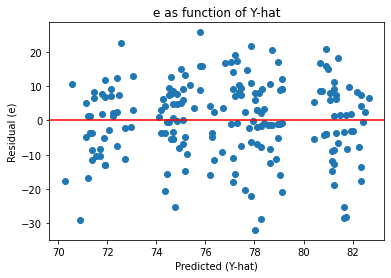

1. The points are around the line e=0
2. Varience is over all constant
The assumptions are reasonable


In [101]:
results_sub = OLS(Y, X).fit()
prediction = results_sub.get_prediction(X)
prediction = prediction.predicted_mean.reshape((-1,1))
plt.scatter(prediction,prediction-Y)
plt.title("e as function of Y-hat")
plt.xlabel("Predicted (Y-hat)")
plt.ylabel("Residual (e)")
plt.axhline(color='r')
plt.show()

print("1. The points are around the line e=0\n2. Varience is over all constant\nThe assumptions are reasonable")

<h3>9.</h3>

In [102]:
subset1000 = df[~(df.index.isin(subset.index.values))].sample(n=1000)
subset1000 = subset1000[['male','age','currentSmoker','heartRate']]
#A
print("#A")
X_new = subset1000[['male','age','currentSmoker']]
X_new = sm.add_constant(X_new)
Y_new = subset1000['heartRate']
Y_pred = curr.predict(X_new)
print(Y_pred)

#B
print("#B")
SS_Res = sum((Y_pred - Y_new)**2)
MS_Res = SS_Res/(n-p)

subset1000['Y_pred'] = Y_pred
subset1000['add'] = X_new.apply(lambda interval : 1.96*np.sqrt(MS_Res*(np.array(interval).T.dot(C.dot(np.array(interval)))+1)), axis=1)
subset1000['lower'] = subset1000['Y_pred'] - subset1000['add']
subset1000['upper'] = subset1000['Y_pred'] + subset1000['add']
print(subset1000[['lower','upper']])

#C
print("#C")
cnt=0
for i in range(1000):
    if subset1000[['lower']].to_numpy()[i]<Y_pred.to_numpy()[i] and subset1000[['upper']].to_numpy()[i]>Y_pred.to_numpy()[i]:
        cnt+=1
if cnt/1000>=0.95:
    print("Close to 95%")
    print("We can conclude that the subset we used in order to fit the model were representative enough\nand came from the same distribution as the whole data")


#A
2077    78.721876
268     70.893930
3817    75.073579
3360    79.119028
3112    75.073579
          ...    
3102    75.629591
1183    78.563016
3505    72.244245
3234    81.471780
362     77.848143
Length: 1000, dtype: float64
#B
          lower       upper
2077  26.690060  130.753692
268   18.636770  123.151089
3817  23.088559  127.058598
3360  26.888613  131.349442
3112  23.088559  127.058598
...         ...         ...
3102  23.552176  127.707005
1183  26.584243  130.541788
3505  20.141352  124.347137
3234  29.485368  133.458192
362   25.920103  129.776183

[1000 rows x 2 columns]
#C
Close to 95%
We can conclude that the subset we used in order to fit the model were representative enough
and came from the same distribution as the whole data


<h3>10.</h3>

In [103]:
df['z12']= df['male']*df['age']
df['z13']= df['male']*df['currentSmoker']
df['z23']= df['age']*df['currentSmoker']
Y = df["heartRate"]
X = df[["ones","z12","z13","z23"]]
X = X.to_numpy()
Y = (Y.to_numpy()).reshape((-1,1))

beta_hat_10 = np.dot(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),Y)
np.set_printoptions(precision=5,suppress=True)
print(f"𝛽̂ old = {beta_hat.T[0]}")
print(f"𝛽̂ new = {beta_hat_10.T[0]}")

results_curr = OLS(Y, X).fit()
print(f"For the old model: \n R_adj^2 : {Rsquared_adj},\
          R^2: {Rsquared}\n")
print(f"For the new model: \n R_adj^2 : {results_curr.rsquared_adj},\
          R^2: {results_curr.rsquared}\n")

print("We will choose the model that maximises R^2 adj ---> The new model")

𝛽̂ old = [74.03549 -6.3982   0.07943  3.70307]
𝛽̂ new = [76.45738 -0.0798   1.45922  0.03092]
For the old model: 
 R_adj^2 : 0.07391500414063623,          R^2: 0.08787608448022466

For the new model: 
 R_adj^2 : 0.022076473468654156,          R^2: 0.022768890409790354

We will choose the model that maximises R^2 adj ---> The new model
